In [1]:
!ls

compare_models-Copy1.ipynb
compare_models.ipynb
data
evaluate_distilled_model_results.ipynb
evaluate_model_all_data.ipynb
evaluate_predictions.ipynb
model_1.keras
model_2_1000_states.dot
model_2_1000_states.json
model_2_1000_states.result
model_2_1500_states.dot
model_2_1500_states.json
model_2_1500_states.result
model_2_300_states.dot
model_2_300_states.json
model_2_300_states.result
model_2_600_states.dot
model_2_600_states.json
model_2_600_states.result
model_2.dot
model_2.json
model_2.keras
model_2_predictions.pk
model_2.result
model_3_13_states.dot
model_3_13_states.json
model_3_13_states.pdf
model_3_13_states.result
model_3_13_states_simplified_blue_labels.dot
model_3_13_states_simplified.dot
model_3_13_states_simplified_no_labels.dot
model_3_1_state.dot
model_3_1_state.json
model_3_1_state.result
model_3_796_states.dot
model_3_796_states.json
model_3_796_states.result
model_3.dot
model_3.json
model_3.keras
model_3_predictions.pk
model_3.result
nn_connector_model.py
predict_and_s

In [2]:
!ls data

anomaly_label.csv  hdfs_test_abnormal  hdfs_train  X_test.dat	y_test.txt
Event_traces.csv   hdfs_test_normal    readme.md   X_train.dat


In [10]:
import pandas as pd
import pickle as pk

MODEL_NAME = "model_3_13_states"

label_file = "data/y_test.txt"
results_file = "{}.result".format(MODEL_NAME)

df = pd.read_csv(results_file, delimiter=";")
df

,row nr,abbadingo trace,state sequence,score sequence,sum scores,mean scores,min score
0,1,"""0 13 26 26 26 17 16 3 16 3 16 3 20 20 20""","[19,47,47,47,9,-1,8,8,8,8,16,16,16,16]","[-0.24207,-0.275704,-0.355243,-1.25147,-4.459...",-48.5301,-3.46644,-10.7719
1,1,"""0 19 26 26 26 17 16 3 16 3 16 3 20 20 20 23 ...","[19,47,47,47,9,-1,8,8,8,8,16,16,16,16,16,16,1...","[-0.24207,-0.275704,-0.355243,-1.25147,-4.459...",-61.5830,-3.07915,-10.7719
2,1,"""1 2 26 17""","[19,19,19]","[-0.24207,-1.46103,-100.1]",-101.8030,-33.93440,-100.1000
3,1,"""0 19 26 26 26 17 16 3 16 3 16 3 20 20 20 23 ...","[19,47,47,47,9,-1,8,8,8,8,16,16,16,16,16,16,1...","[-0.24207,-0.275704,-0.355243,-1.25147,-4.459...",-61.5830,-3.07915,-10.7719
4,1,"""1 2 26 17""","[19,19,19]","[-0.24207,-1.46103,-100.1]",-101.8030,-33.93440,-100.1000
...,...,...,...,...,...,...,...
33520,1,"""0 19 26 26 26 17 16 3 16 3 16 3 20 20 20 23 ...","[19,47,47,47,9,-1,8,8,8,8,16,16,16,16,16,16,1...","[-0.24207,-0.275704,-0.355243,-1.25147,-4.459...",-61.5830,-3.07915,-10.7719
33521,1,"""0 13 26 26 26 17 16 3 16 3 16 3 20 20 20""","[19,47,47,47,9,-1,8,8,8,8,16,16,16,16]","[-0.24207,-0.275704,-0.355243,-1.25147,-4.459...",-48.5301,-3.46644,-10.7719
33522,1,"""1 22 17 26 26 26 20 20 20 16 3 16 3 16 3 18 ...","[9,19,47,47,-1,13,97,92,13,92,13,92,13,16,16,...","[-1.60959,-0.0880207,-0.275704,-0.355243,-7.2...",-74.7860,-3.25157,-11.3273
33523,1,"""1 32 17 26 26 26 20 20 20 16 3 16 3 16 3 10 ...","[9,19,47,47,-1,13,97,92,13,92,13,92,13,13,13,...","[-1.60959,-0.0880207,-0.275704,-0.355243,-7.2...",-105.7720,-3.20521,-11.1802


In [11]:
y = list()
with open(label_file, "rt") as inf:
    for line in inf:
        line = line.strip("\n")
        y.append(int(line))
len(df), len(y)

(33525, 33525)

In [12]:
df.columns

Index(['row nr', ' abbadingo trace', ' state sequence', ' score sequence',
       ' sum scores', ' mean scores', ' min score'],
      dtype='object')

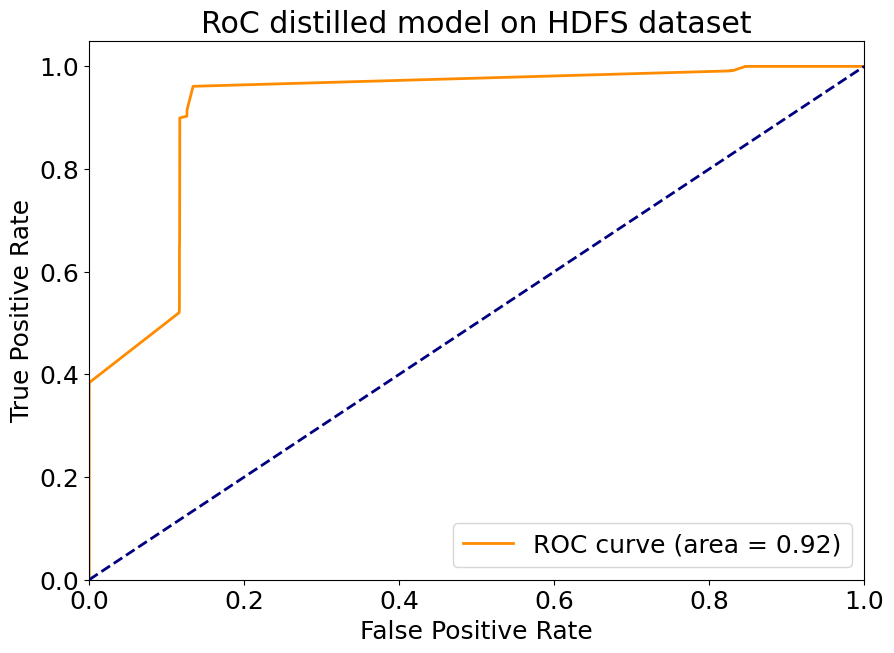

In [14]:
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#score = -df[" min score"]
score = -df[" min score"]

fpr, tpr, thresholds = roc_curve(y, score)
roc_auc = roc_auc_score(y, score)

plt.figure(figsize=(10, 7))
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RoC distilled model on HDFS dataset")
plt.legend(loc="lower right")
plt.savefig("roc_distilled_model_hdfs_{}.png".format(MODEL_NAME))